In [1]:
import matplotlib.pyplot as plt
import PIL.Image as Image
import numpy as np
import os
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from shutil import copyfile
from keras.preprocessing import image
import cv2
from sklearn import preprocessing
import datetime
from sklearn.model_selection import train_test_split
import shutil

In [2]:
!pip install -q kaggle

In [3]:
os.environ['KAGGLE_USERNAME'] = 'savishwa'
os.environ['KAGGLE_KEY'] = '0b3ac853466440e89fb1741a45dbf423'

In [4]:
!mkdir ~/.kaggle #5
!kaggle datasets list
!kaggle competitions download -c 'dog-breed-identification'
!mkdir dog-breed-identification
!unzip dog-breed-identification.zip -d dog-breed-identification

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed-identification/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed-identification/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed-identification/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed-identification/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed-identification/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed-identification/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed-identification/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed-identification/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed-identification/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed-identification/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed-identification/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed-identificatio

In [5]:
%cd dog-breed-identification
!mkdir train2
!mv train train2

/content/dog-breed-identification


In [6]:
labels_df = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW3/dog-breed-identification/labels.csv?raw=true')
# dir = '/content/dog-breed-identification/'

# data_dir='/content/dog-breed-identification/train2/'
# val_dir='/content/dog-breed-identification/test/'

In [7]:
# data = tf.keras.utils.image_dataset_from_directory(
#   data_dir, # path to the file
#   seed=999, 
#   labels=labels_df['breed'].to_numpy().tolist(),
#   label_mode='int',
#   subset=None,
#   image_size=(256, 256),
#   validation_split = None
# )

In [8]:
labels_df.shape

(10222, 2)

In [9]:
# unique_labels = labels_df['breed'].unique()
# map = {}
# counter = 0
# for label in unique_labels:
#     map[label] = counter
#     counter += 1

In [10]:
# labels_df['breed'] = labels_df['breed'].map(map)

In [11]:
labels_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [12]:
import math
# labels_train, labels_test = train_test_split(labels_df, test_size=0.2, random_state = 42)
size = len(labels_df)
labels_train = labels_df[:math.ceil(size*0.8)]
labels_test = labels_df[math.ceil(size*0.8):]

# cc93915e06bc55626a02af95006a48c2	

In [13]:
%cd /content/dog-breed-identification/train2/

/content/dog-breed-identification/train2


In [14]:
%mkdir trainSplit
%cd trainSplit
%mkdir data

/content/dog-breed-identification/train2/trainSplit


In [15]:
%cd ..
%ls

/content/dog-breed-identification/train2
train/  trainSplit/


In [16]:
%mkdir testSplit
%cd testSplit
%mkdir data

/content/dog-breed-identification/train2/testSplit


In [17]:
%cd ..
%ls

/content/dog-breed-identification/train2
testSplit/  train/  trainSplit/


In [18]:
dir = '/content/dog-breed-identification/train2/train'
dir_list = os.listdir(dir)
train_dir = '/content/dog-breed-identification/train2/trainSplit'
test_dir = '/content/dog-breed-identification/train2/testSplit'

In [19]:
%cd /content/dog-breed-identification/train2/train

/content/dog-breed-identification/train2/train


In [20]:
dir_prefix = '/content/dog-breed-identification-data/'

unique_train_labels = labels_train['breed'].unique()
unique_test_labels = labels_test['breed'].unique()

for label in unique_train_labels:
    dir = '/content/dog-breed-identification/train2/trainSplit/data/' + label
    os.mkdir(dir)

for label in unique_test_labels:
    dir = '/content/dog-breed-identification/train2/testSplit/data/' + label
    os.mkdir(dir)


In [21]:
labels_train

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
8173,cc791d33102c4dd55ef715f98be1ff23,rottweiler
8174,cc7ae3da3bebcc4acb10128078cdf29a,vizsla
8175,cc7af1c37c65fee4e036571c7f5b55f9,keeshond
8176,cc8ec46c8c1ff5337ac636a9c21abcc2,papillon


In [22]:
for id, breed in zip(labels_train['id'], labels_train['breed']):
    id += '.jpg'
    for f in dir_list:
        if id == f:
            shutil.move(f, train_dir + '/data/' + breed)

In [23]:
for id, breed in zip(labels_test['id'], labels_test['breed']):
    id += '.jpg'
    for f in dir_list:
        if id == f:
            shutil.move(f, test_dir + '/data/' + breed)

In [24]:
ds_dir = '/content/dog-breed-identification/train2'
BATCH_SIZE = 32

In [25]:
train_ds_dir = '/content/dog-breed-identification/train2/trainSplit/data'
test_ds_dir = '/content/dog-breed-identification/train2/testSplit/data'

In [90]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_ds_dir, # path to the file
    seed = 42, 
    labels = 'inferred',# labels_train['breed'].to_numpy().tolist(),
    label_mode = 'int',
    subset = 'training',
    image_size = (160, 160),
    batch_size = BATCH_SIZE,
    validation_split = 0.2
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_ds_dir, # path to the file
    seed = 42, 
    labels = 'inferred',# labels_train['breed'].to_numpy().tolist(),
    label_mode = 'int',
    subset = 'validation',
    image_size = (160, 160),
    batch_size = BATCH_SIZE,
    validation_split = 0.2
)


Found 8178 files belonging to 120 classes.
Using 6543 files for training.
Found 8178 files belonging to 120 classes.
Using 1635 files for validation.


In [91]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_ds_dir, # path to the file
    seed = 42, 
    labels = 'inferred',# labels_train['breed'].to_numpy().tolist(),
    label_mode = 'int',
    image_size = (160, 160),
    batch_size = BATCH_SIZE,
)


Found 2044 files belonging to 120 classes.


In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)

In [29]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

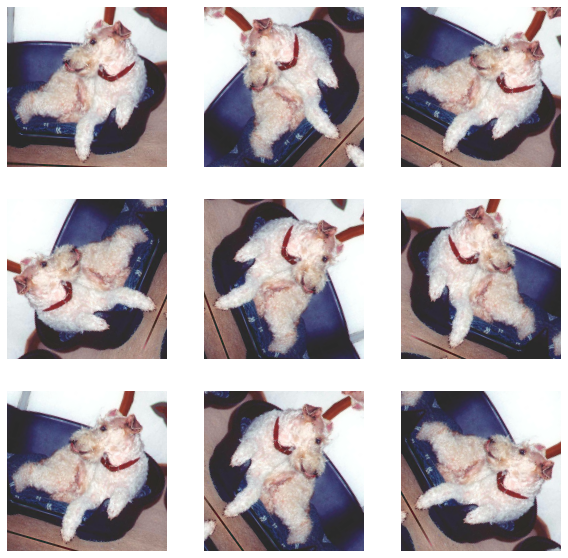

In [30]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [31]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [32]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [33]:
IMG_SIZE = (160, 160)

In [34]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [35]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [36]:
base_model.trainable = False

In [37]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [38]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [39]:
prediction_layer = tf.keras.layers.Dense(120)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 120)


In [40]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [41]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [43]:
len(model.trainable_variables)

2

In [44]:
initial_epochs = 10

history = model.fit(train_ds, epochs = initial_epochs, validation_data = validation_ds)

Epoch 1/10
205/205 [==============================] - 20s 82ms/step - loss: 11.8865 - accuracy: 0.0326 - val_loss: 6.5526 - val_accuracy: 0.0673
Epoch 2/10
205/205 [==============================] - 16s 77ms/step - loss: 5.8822 - accuracy: 0.0491 - val_loss: 5.2201 - val_accuracy: 0.0734
Epoch 3/10
205/205 [==============================] - 19s 89ms/step - loss: 5.2199 - accuracy: 0.0515 - val_loss: 4.9941 - val_accuracy: 0.0716
Epoch 4/10
205/205 [==============================] - 16s 77ms/step - loss: 5.0028 - accuracy: 0.0506 - val_loss: 4.8871 - val_accuracy: 0.0795
Epoch 5/10
205/205 [==============================] - 16s 77ms/step - loss: 4.9659 - accuracy: 0.0454 - val_loss: 4.8560 - val_accuracy: 0.0820
Epoch 6/10
205/205 [==============================] - 17s 82ms/step - loss: 4.8813 - accuracy: 0.0481 - val_loss: 4.8285 - val_accuracy: 0.0795
Epoch 7/10
205/205 [==============================] - 16s 77ms/step - loss: 4.8883 - accuracy: 0.0478 - val_loss: 4.8264 - val_accuracy

In [45]:
loss0, accuracy0 = model.evaluate(validation_ds)

52/52 [==============================] - 3s 43ms/step - loss: 4.7919 - accuracy: 0.0716


# Feature Extraction

In [46]:
base_model.trainable = True

In [47]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [48]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [49]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [50]:
len(model.trainable_variables)


56

In [51]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 10/20
205/205 [==============================] - 25s 93ms/step - loss: 4.8120 - accuracy: 0.0452 - val_loss: 4.7846 - val_accuracy: 0.0697
Epoch 11/20
205/205 [==============================] - 18s 85ms/step - loss: 4.7915 - accuracy: 0.0433 - val_loss: 4.7875 - val_accuracy: 0.0612
Epoch 12/20
205/205 [==============================] - 19s 89ms/step - loss: 4.7876 - accuracy: 0.0396 - val_loss: 4.7875 - val_accuracy: 0.0606
Epoch 13/20
205/205 [==============================] - 17s 84ms/step - loss: 4.7879 - accuracy: 0.0413 - val_loss: 4.7875 - val_accuracy: 0.0673
Epoch 14/20
205/205 [==============================] - 18s 85ms/step - loss: 4.7900 - accuracy: 0.0376 - val_loss: 4.7875 - val_accuracy: 0.0612
Epoch 15/20
205/205 [==============================] - 19s 91ms/step - loss: 4.7831 - accuracy: 0.0356 - val_loss: 4.7787 - val_accuracy: 0.0648
Epoch 16/20
205/205 [==============================] - 18s 85ms/step - loss: 4.7792 - accuracy: 0.0413 - val_loss: 4.7855 - val_ac

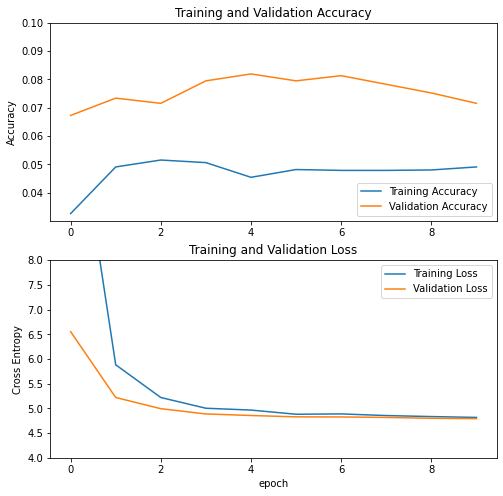

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([4,8.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [53]:
history.history

{'loss': [11.886492729187012,
  5.882164001464844,
  5.2198805809021,
  5.002801895141602,
  4.965850353240967,
  4.881250858306885,
  4.8883161544799805,
  4.854684352874756,
  4.834328651428223,
  4.816956043243408],
 'accuracy': [0.03255387395620346,
  0.04906006529927254,
  0.051505424082279205,
  0.05058841407299042,
  0.04539202153682709,
  0.04814305528998375,
  0.047837384045124054,
  0.047837384045124054,
  0.04799021780490875,
  0.04906006529927254],
 'val_loss': [6.5526347160339355,
  5.220050811767578,
  4.994091510772705,
  4.887121200561523,
  4.855998992919922,
  4.828535556793213,
  4.826367378234863,
  4.817047595977783,
  4.799551963806152,
  4.791916847229004],
 'val_accuracy': [0.06727828830480576,
  0.07339449226856232,
  0.07155963033437729,
  0.07951070368289948,
  0.08195718377828598,
  0.07951070368289948,
  0.0813455656170845,
  0.07828745990991592,
  0.07522935420274734,
  0.07155963033437729]}

# Fine Tuning

In [54]:
base_model.trainable = True

In [55]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [56]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [57]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [58]:
len(model.trainable_variables)

56

In [59]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 10/20
205/205 [==============================] - 18s 84ms/step - loss: 4.7822 - accuracy: 0.0376 - val_loss: 4.7758 - val_accuracy: 0.0654
Epoch 11/20
205/205 [==============================] - 18s 84ms/step - loss: 4.7846 - accuracy: 0.0425 - val_loss: 4.7729 - val_accuracy: 0.0691
Epoch 12/20
205/205 [==============================] - 19s 89ms/step - loss: 4.7860 - accuracy: 0.0384 - val_loss: 4.7787 - val_accuracy: 0.0636
Epoch 13/20
205/205 [==============================] - 18s 85ms/step - loss: 4.7839 - accuracy: 0.0388 - val_loss: 4.7729 - val_accuracy: 0.0685
Epoch 14/20
205/205 [==============================] - 19s 89ms/step - loss: 4.7794 - accuracy: 0.0437 - val_loss: 4.7735 - val_accuracy: 0.0673
Epoch 15/20
205/205 [==============================] - 18s 86ms/step - loss: 4.7727 - accuracy: 0.0422 - val_loss: 4.7735 - val_accuracy: 0.0667
Epoch 16/20
205/205 [==============================] - 18s 84ms/step - loss: 4.7814 - accuracy: 0.0394 - val_loss: 4.7758 - val_ac

In [60]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

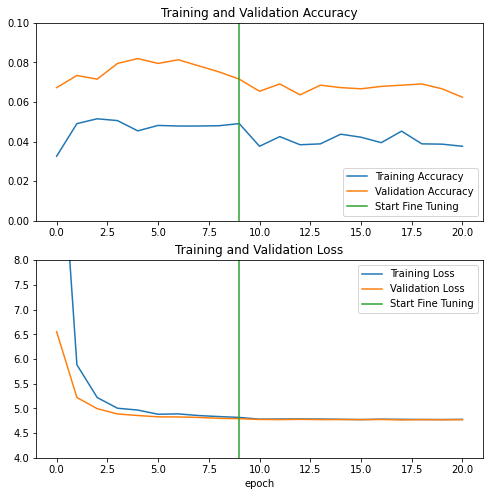

In [61]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 0.1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([4, 8.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [62]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

64/64 [==============================] - 4s 51ms/step - loss: 4.7764 - accuracy: 0.0582
Test accuracy : 0.05821917951107025


In [65]:
class_names = labels_train['breed']

1/1 [==============================] - 0s 31ms/step


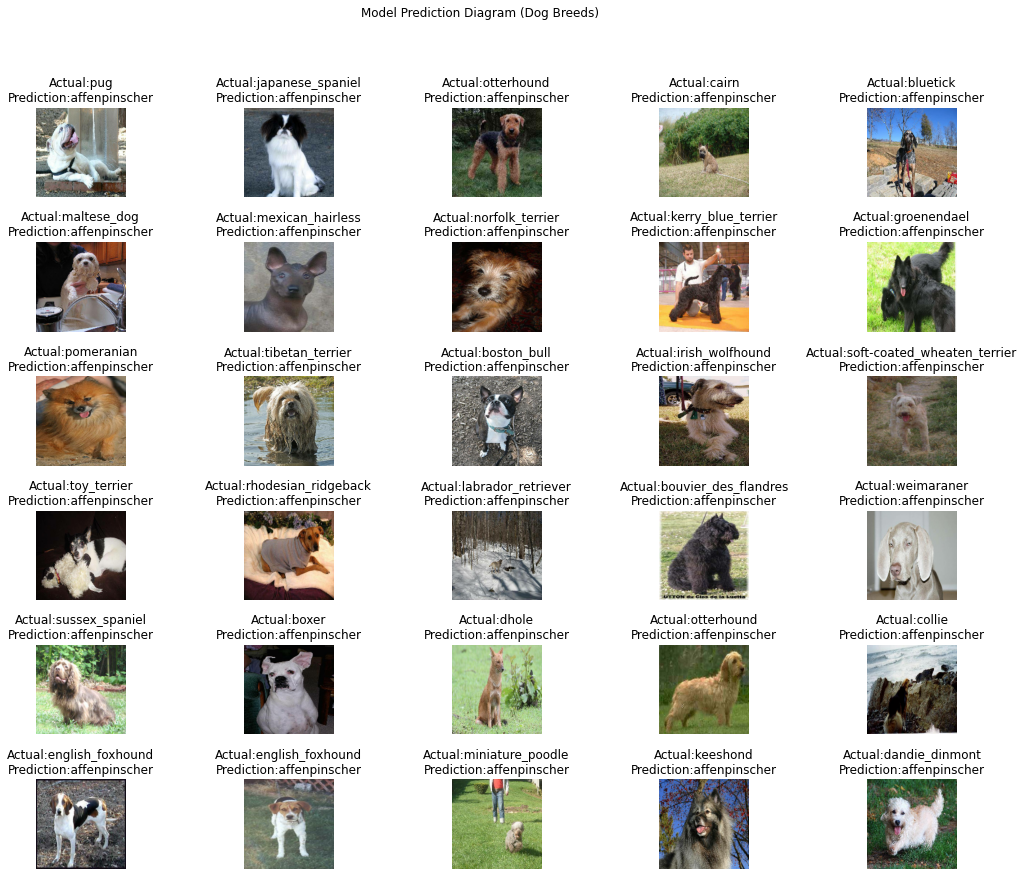

In [98]:
class_names = test_ds.class_names

plt.figure(figsize=(18, 14))
plt.subplots_adjust(hspace=0.5)

for images, labels in test_ds.take(1):
  lbl=labels.numpy()

  results = model.predict(images)
  predictions = np.array(tf.math.argmax(results, axis=-1))

  for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("Actual:" + class_names[lbl[i]] +  "\nPrediction:" + class_names[predictions[i]])
    plt.axis("off")
  _ = plt.suptitle("Model Prediction Diagram (Dog Breeds)")

# Parameter Tuning

In [77]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          epochs = 15,
          validation_data = validation_ds)

model.evaluate(test_ds)

Epoch 1/15
205/205 [==============================] - 22s 88ms/step - loss: 4.7895 - accuracy: 0.0167 - val_loss: 4.7875 - val_accuracy: 0.0055
Epoch 2/15
205/205 [==============================] - 19s 91ms/step - loss: 4.7889 - accuracy: 0.0095 - val_loss: 4.7875 - val_accuracy: 0.0080
Epoch 3/15
205/205 [==============================] - 21s 99ms/step - loss: 4.7875 - accuracy: 0.0104 - val_loss: 4.7875 - val_accuracy: 0.0080
Epoch 4/15
205/205 [==============================] - 18s 85ms/step - loss: 4.7904 - accuracy: 0.0110 - val_loss: 4.7875 - val_accuracy: 0.0135
Epoch 5/15
205/205 [==============================] - 18s 87ms/step - loss: 4.7890 - accuracy: 0.0092 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 6/15
205/205 [==============================] - 17s 83ms/step - loss: 4.7875 - accuracy: 0.0078 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 7/15
205/205 [==============================] - 18s 88ms/step - loss: 4.7875 - accuracy: 0.0060 - val_loss: 4.7875 - val_accuracy:

[4.787493705749512, 0.009295498952269554]

In [79]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          epochs = 10,
          validation_data = validation_ds)

model.evaluate(test_ds)

Epoch 1/10
205/205 [==============================] - 25s 91ms/step - loss: 4.7875 - accuracy: 0.0069 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 2/10
205/205 [==============================] - 19s 92ms/step - loss: 4.7875 - accuracy: 0.0086 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 3/10
205/205 [==============================] - 20s 98ms/step - loss: 4.7875 - accuracy: 0.0066 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 4/10
205/205 [==============================] - 19s 92ms/step - loss: 4.7875 - accuracy: 0.0073 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 5/10
205/205 [==============================] - 18s 87ms/step - loss: 4.7875 - accuracy: 0.0079 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 6/10
205/205 [==============================] - 19s 91ms/step - loss: 4.7875 - accuracy: 0.0090 - val_loss: 4.7875 - val_accuracy: 0.0147
Epoch 7/10
205/205 [==============================] - 19s 92ms/step - loss: 4.7875 - accuracy: 0.0072 - val_loss: 4.7875 - val_accuracy:

[4.787493705749512, 0.009295498952269554]

In [80]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Ftrl(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          epochs = 10,
          validation_data = validation_ds)

model.evaluate(test_ds)

Epoch 1/10
205/205 [==============================] - 25s 99ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 2/10
205/205 [==============================] - 18s 85ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 3/10
205/205 [==============================] - 18s 88ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 4/10
205/205 [==============================] - 19s 89ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 5/10
205/205 [==============================] - 22s 105ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 6/10
205/205 [==============================] - 18s 87ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 7/10
205/205 [==============================] - 18s 85ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy

[4.787493705749512, 0.008806262165307999]

In [81]:
base_learning_rate = 0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          epochs = 10,
          validation_data = validation_ds)

model.evaluate(test_ds)

Epoch 1/10
205/205 [==============================] - 21s 86ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 2/10
205/205 [==============================] - 18s 86ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 3/10
205/205 [==============================] - 18s 87ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 4/10
205/205 [==============================] - 17s 82ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 5/10
205/205 [==============================] - 23s 111ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 6/10
205/205 [==============================] - 23s 106ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 7/10
205/205 [==============================] - 18s 87ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accurac

[4.787493705749512, 0.008806262165307999]

In [82]:
base_learning_rate = 0.002
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          epochs = 10,
          validation_data = validation_ds)

model.evaluate(test_ds)

Epoch 1/10
205/205 [==============================] - 22s 92ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 2/10
205/205 [==============================] - 19s 92ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 3/10
205/205 [==============================] - 17s 82ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 4/10
205/205 [==============================] - 18s 87ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 5/10
205/205 [==============================] - 17s 81ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 6/10
205/205 [==============================] - 17s 82ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 7/10
205/205 [==============================] - 18s 86ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy:

[4.787493705749512, 0.008806262165307999]

In [83]:
base_learning_rate = 0.04
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          epochs = 10,
          validation_data = validation_ds)

model.evaluate(test_ds)

Epoch 1/10
205/205 [==============================] - 22s 90ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 2/10
205/205 [==============================] - 18s 87ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 3/10
205/205 [==============================] - 17s 81ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 4/10
205/205 [==============================] - 17s 81ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 5/10
205/205 [==============================] - 18s 86ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 6/10
205/205 [==============================] - 17s 82ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy: 0.0049
Epoch 7/10
205/205 [==============================] - 17s 82ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7875 - val_accuracy:

[4.787493705749512, 0.008806262165307999]